# 1. Without using Scikit Learn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Data Preparation

y = mx+b 

y =2x -3

In [3]:
def datamaker(N,err):
    x = np.linspace(-1,1,N)
    
    y  = 2*x -3
    y = y + err*np.random.randn(N)
    
    return x,y

In [8]:
X_train, y_train = datamaker(500,0.2)

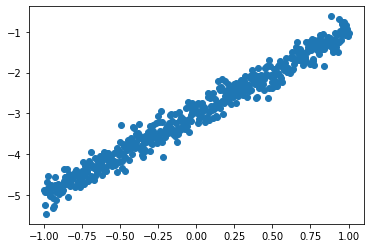

In [9]:
plt.scatter(X_train,y_train)

In [10]:
w_actual =2
b_actual = -3

In [11]:
df = pd.DataFrame({"X_train":X_train, "y_train":y_train})

In [12]:
df

,X_train,y_train
0,-1.000000,-4.878583
1,-0.995992,-5.261024
2,-0.991984,-4.941330
3,-0.987976,-5.469763
4,-0.983968,-4.683016
...,...,...
495,0.983968,-0.833186
496,0.987976,-0.976695
497,0.991984,-0.928940
498,0.995992,-1.103844


In [13]:
X = np.array(df[['X_train']])
y = np.array(df[['y_train']])

In [14]:
X.shape

(500, 1)

In [15]:
y.shape

(500, 1)

In [17]:
# Cost Function: That defines how bad our model prediction is compared to actual values, MSE

In [18]:
def costfunc(w,b,X,y):
    Z = np.dot(X,w)+b
    
    ##Xshape = 500*1
    ## Wshape = 1*1
    ## bshape = 1*1
    ## Zshape = 500*1
    ## y shape = 500*1
    
    loss = (y-Z)**2
    
    m = len(Z)
    
    j = ((1/m)*np.sum(loss))
    
    return j

Formulas:


## 1. $ J(w,b) = \frac {1}{m} \sum [y - (W.X + b)]^2 $
## 2. $ \frac {\partial J}{\partial W} = \frac {-2}{m} (X^T . [y - (W.X + b)]) $
## 3. $ \frac {\partial J} {\partial b} = \frac {-2}{m} \sum [ y - (W.X + b) ] $

In [19]:
def gradient(w,b,X,y):
    
    #dw = dJ/dw = Xt.(y-Z) = 1x500.500x1 = 1x1
    #db = dJ/db = 1x1
    
        
    #X - 500x1
    #y - 500x1
    #w - 1x1
    #b - 1x1
    
    Z = np.dot(X , w) + b
    
    J = costfunc(w,b,X,y)
    
    m = X.shape[0]
    
    dw = (-2/m)*np.dot(X.T , (y - Z))
    
    db = (-2/m)*np.sum(y - Z)
    
    return dw , db

In [20]:
## Training

## Initial random weights

w = np.random.randint(0,10)
b = np.random.randint(0,10)

print(w,b)
print(costfunc(w,b,X,y))

4 0
10.341526867850384


In [21]:
y_pred = w*X+b


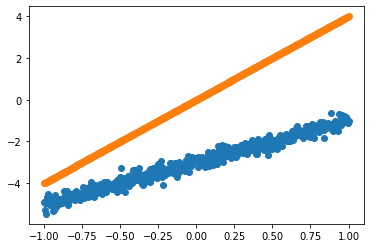

In [22]:
plt.scatter(X_train,y_train)
plt.scatter(X,y_pred)

In [23]:
#lets make our machine learn

def learning(w,b,X,y,iteration):
    Z = np.dot(X,w)+b
    
    costs = []
    
    costs.append(costfunc(w,b,X,y))
    
    for e in range(iteration):
        dw,db = gradient(w,b,X,y)
        
        w = w - 0.005*dw
        b = b - 0.005*db
        
        costs.append(costfunc(w,b,X,y))
        
    wf = w
    bf = b
    
    return wf,bf,costs

In [24]:
wf,bf,costs = learning(w,b,X,y,1000)

In [25]:
wf

array([[2.07300456]])

In [26]:
bf

-2.994319423169568

In [27]:
w_actual

2

In [28]:
b_actual

-3

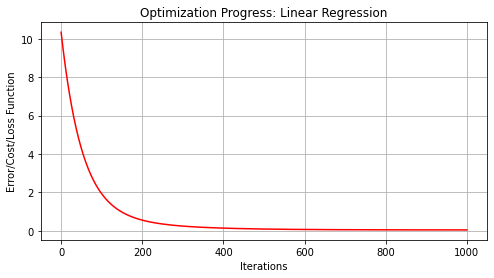

In [29]:
plt.figure(figsize=(8,4))
plt.plot(costs,c="red")
plt.xlabel("Iterations")
plt.ylabel("Error/Cost/Loss Function")
plt.title("Optimization Progress: Linear Regression")

plt.grid()

In [30]:
Actual = ["w = 2","b = -3"]

ModelResults = [f"w = {wf[0][0]}", f"b = {bf}"]

In [31]:
results = pd.DataFrame({'Actual Parameters':Actual , 'Model-Parameters':ModelResults})

In [32]:
results

,Actual Parameters,Model-Parameters
0,w = 2,w = 2.073004557902766
1,b = -3,b = -2.994319423169568


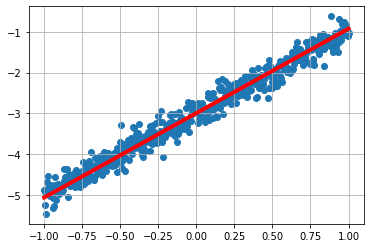

In [36]:
plt.scatter(X_train,y_train)
plt.plot(X_train,wf[0][0]*X_train+bf,c="red",lw=4)
plt.grid()

In [37]:
## Making predictions

xpre = int(input("Enter value for which you want predictions: "))
ypre = wf[0][0]*xpre + bf

yact = 2*xpre -3

print("y_predicted is: "+ str(ypre) + '. Y_actual is: '+ str(yact))

Enter value for which you want predictions: 5
y_predicted is: 7.370703366344262. Y_actual is: 7


## By using sckit learn

In [43]:
X_train.shape

(500,)

In [44]:
X_train_2d = X_train.reshape(-1,1)

In [45]:
X_train_2d.shape

(500, 1)

In [39]:
y_train

array([-4.87858294, -5.26102402, -4.94133046, -5.46976335, -4.68301645,
       -4.93310246, -4.53033398, -4.84291984, -4.82681363, -4.95256245,
       -5.0349173 , -4.7638128 , -4.78711031, -4.83506281, -5.32170484,
       -5.088837  , -5.27480564, -4.55259183, -4.75073952, -5.13696354,
       -4.92357949, -4.84897506, -4.74084455, -4.76318127, -4.85987494,
       -4.98920838, -4.94223176, -4.79318555, -4.764095  , -4.9438008 ,
       -4.79554113, -4.88409604, -4.65472468, -4.37527292, -4.57198168,
       -4.55839903, -4.74519608, -4.64958437, -4.37732215, -5.0497101 ,
       -4.53744142, -4.49705191, -4.79261047, -4.51605103, -4.7317836 ,
       -4.6080988 , -4.61480679, -4.58629428, -4.5303808 , -4.48855127,
       -4.44473766, -4.80276052, -4.50169427, -4.39492805, -4.47819965,
       -4.69033718, -4.67815821, -4.57083677, -4.58539246, -4.81513055,
       -4.51942634, -4.63491212, -4.41878993, -4.68486975, -4.18766823,
       -4.53115306, -4.72622689, -4.29327677, -4.36012084, -4.23

In [40]:
from sklearn.linear_model import LinearRegression

In [46]:
model = LinearRegression()

model.fit(X_train_2d,y_train, )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0.5, 1.0, 'Training Performance')

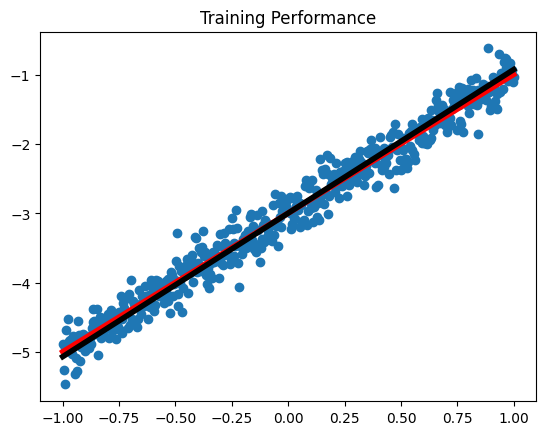

In [50]:
plt.style.use('default')

plt.scatter(X_train,y_train)
plt.plot(X_train , model.predict(X_train_2d) , c='r', lw=4)
plt.plot(X_train,wf[0][0]*X_train+bf,c="black",lw=4)


plt.title('Training Performance')